# Generatic Algorithm Result Analysis

## Outline

### Parameters
1. Different S = 100, 200
2. Different n (S/2, S, 2S)
3. Different distributions (uniform, half-and-half, Zipf-1, Zipf-1/2)
4. Different setting: given the distribution or only with samples

### Questions
1. Time
2. Success rate & improvement
3. Effect of distribution on the formula

## Data generation

In [6]:
import os
import itertools
import pandas as pd
from cliffs_delta import cliffs_delta
import numpy as np


def vda(data1, data2):
    d, _ = cliffs_delta(data1, data2)
    return d / 2 + 0.5

Sns = [
    (100, 50),
    (100, 100),
    (100, 200),
    (200, 100),
    (200, 200),
    (200, 400),
]

disttypes = ["uniform", "half", "zipfhalf", "zipf", "diri", "dirihalf"]
p_est_method = "nGT"
maxterm = 20

seeds = list(range(60))

dir_path_temp = os.path.join(
    "/Better-Turing/result/iclr",  # the path to the result
    "S{S}-n{n}-k0-{dist}-" + f"{p_est_method}-max{maxterm}",
    "evolutions",
)

data_path_seeded_temp = os.path.join(dir_path_temp, "seed{seed}", "evo{evo}")
data_path_knowing_temp = os.path.join(dir_path_temp, "knowing", "evo{evo}")
assess_path_temp = os.path.join("{data_path}", "assess.csv")
record_path_temp = os.path.join("{data_path}", "record.csv")

### Load data of `sampling` setting

In [7]:
data_sampling = []

for Sn, disttype, smp_idx, evo_idx in itertools.product(
    Sns, disttypes, range(100), range(2, 3)
):
    S, n = Sn
    data_path = data_path_seeded_temp.format(
        S=S,
        n=n,
        dist=disttype,
        seed=smp_idx,
        evo=evo_idx,
    )
    assess_path = assess_path_temp.format(data_path=data_path)
    record_path = record_path_temp.format(data_path=data_path)
    if os.path.exists(assess_path):
        assess_df = pd.read_csv(assess_path)
        good_mse = assess_df.loc[
            assess_df["formula"] == "Good-Turing formula", "mse"
        ].values[0]
        evo_mse = assess_df.loc[
            assess_df["formula"] == "Evolution formula", "mse"
        ].values[0]
        ratio = evo_mse / good_mse
        success = ratio < 1

        good_se = assess_df.loc[
            assess_df["formula"] == "Good-Turing formula", "se"
        ].values[0]
        evo_se = assess_df.loc[
            assess_df["formula"] == "Evolution formula", "se"
        ].values[0]
        ratio_se = evo_se / good_se
        success_se = ratio_se < 1

        record_df = pd.read_csv(record_path)
        time = sum(record_df["mean_time"])
        gen = len(record_df)
        mean_time = time / gen

        data_sampling.append(
            {
                "S": S,
                "n/S": n / S,
                "n": n,
                "dist": disttype,
                "smp_idx": smp_idx,
                "evo_idx": evo_idx,
                "good_mse": good_mse,
                "evo_mse": evo_mse,
                "ratio": ratio,
                "success": success,
                "good_se": good_se,
                "evo_se": evo_se,
                "ratio_se": ratio_se,
                "success_se": success_se,
                "gen": gen,
                "time": time,
                "mean_time": mean_time,
            }
        )
    else:
        # check if record exists
        if os.path.exists(record_path):
            print(f"not found: {assess_path} but record exists")
        else:
            print(f"not found: {assess_path}")
df_sampling = pd.DataFrame(data_sampling)
print(f"df_sampling.shape: {df_sampling.shape}")
display(df_sampling)

/tmp/ipykernel_191211/45205619.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  ratio_se = evo_se / good_se
/tmp/ipykernel_191211/45205619.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  ratio_se = evo_se / good_se
/tmp/ipykernel_191211/45205619.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  ratio_se = evo_se / good_se
/tmp/ipykernel_191211/45205619.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  ratio_se = evo_se / good_se
/tmp/ipykernel_191211/45205619.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  ratio_se = evo_se / good_se
/tmp/ipykernel_191211/45205619.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  ratio_se = evo_se / good_se
/tmp/ipykernel_191211/45205619.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  ratio_se = evo_se / good_se
/tmp/ipykernel_191211/45205619.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  rati

df_sampling.shape: (3600, 17)


,S,n/S,n,dist,smp_idx,evo_idx,good_mse,evo_mse,ratio,success,good_se,evo_se,ratio_se,success_se,gen,time,mean_time
0,100,0.5,50,uniform,0,2,0.010928,0.006107,0.558855,True,0.000900,0.005993,6.659170,False,500,87.144932,0.174290
1,100,0.5,50,uniform,1,2,0.010928,0.003060,0.280020,True,0.000100,0.003166,31.660662,False,700,118.252165,0.168932
2,100,0.5,50,uniform,2,2,0.010928,0.005371,0.491480,True,0.012100,0.007092,0.586123,True,500,108.673606,0.217347
3,100,0.5,50,uniform,3,2,0.010928,0.009734,0.890793,True,0.003600,0.002490,0.691606,True,200,27.125247,0.135626
4,100,0.5,50,uniform,4,2,0.010928,0.009293,0.850387,True,0.004900,0.006419,1.309965,False,200,19.046568,0.095233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,200,2.0,400,dirihalf,95,2,0.000492,0.000485,0.986556,True,0.001435,0.001536,1.070789,False,500,391.767555,0.783535
3596,200,2.0,400,dirihalf,96,2,0.000482,0.000430,0.890697,True,0.000084,0.000112,1.332942,False,200,111.164794,0.555824
3597,200,2.0,400,dirihalf,97,2,0.000475,0.000415,0.875385,True,0.000041,0.000010,0.252181,True,200,147.038035,0.735190
3598,200,2.0,400,dirihalf,98,2,0.000480,0.000371,0.772288,True,0.000657,0.001151,1.751513,False,300,152.445567,0.508152


## Q1. Time (RQ 2)

### Overall

In [8]:
# statistics of time
print("## [Time]")
print(df_sampling["time"].describe())
print("##[Mean time]")
print(df_sampling["mean_time"].describe())

## [Time]
count    3600.000000
mean      142.990869
std       294.792968
min         4.189286
25%        29.711641
50%        63.216179
75%       138.411891
max      5226.869039
Name: time, dtype: float64
##[Mean time]
count    3600.000000
mean        0.397793
std         0.463547
min         0.041893
25%         0.143658
50%         0.229681
75%         0.443380
max         4.292318
Name: mean_time, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Time per S, n, disttype

## [Time]
### per S
      count        mean         std       min        25%         50%  \
S                                                                      
100  1800.0   57.195348   47.553291  4.503978  24.136619   45.289277   
200  1800.0  228.786390  396.059153  4.189286  43.932436  119.150242   

            75%          max  
S                             
100   74.124663   477.239169  
200  243.901659  5226.869039  
### per n/S
      count        mean         std       min        25%        50%  \
n/S                                                                   
0.5  1200.0   87.959312  110.278747  4.189286  23.766956  53.612967   
1.0  1200.0  128.349348  289.731678  4.661280  24.889737  56.188863   
2.0  1200.0  212.663946  395.782587  5.342367  43.911972  81.697422   

            75%          max  
n/S                           
0.5  108.629303   964.594410  
1.0  136.670203  5226.869039  
2.0  187.256518  3354.297631  
### per n
      count        mean         st

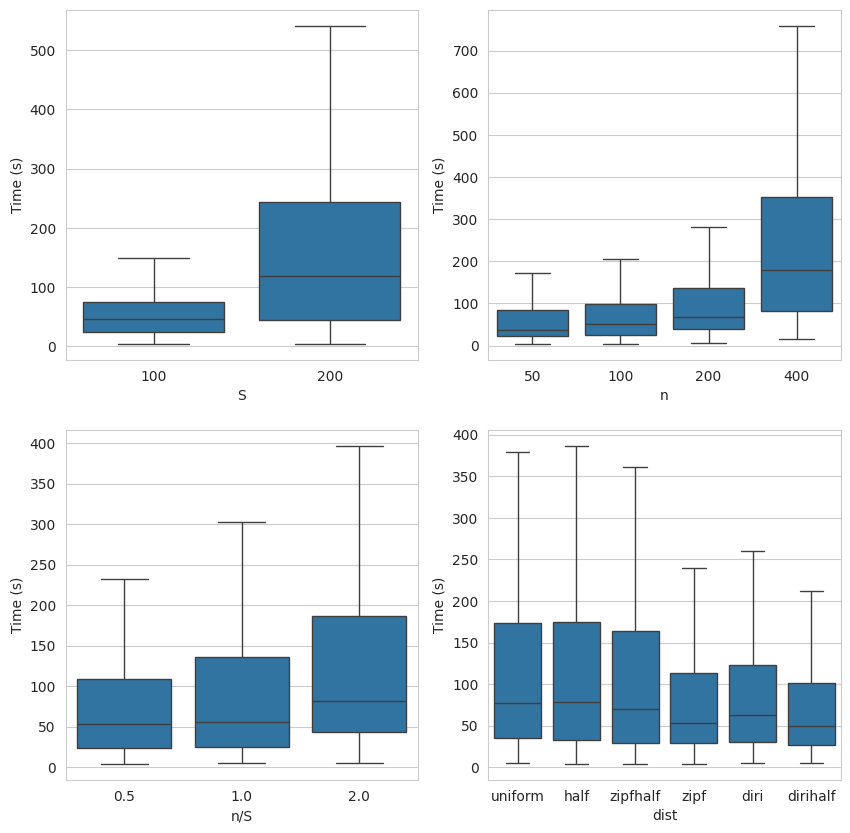

In [10]:
print("## [Time]")
# per S
print("### per S")
print(df_sampling.groupby("S")["time"].describe())
# per n/S
print("### per n/S")
print(df_sampling.groupby("n/S")["time"].describe())
# per n
print("### per n")
print(df_sampling.groupby("n")["time"].describe())
# per dist
print("### per dist")
print(df_sampling.groupby("dist")["time"].describe())
print()
print("## [Mean time]")
# per S
print("### per S")
print(df_sampling.groupby("S")["mean_time"].describe())
# per n/S
print("### per n/S")
print(df_sampling.groupby("n/S")["mean_time"].describe())
# per n
print("### per n")
print(df_sampling.groupby("n")["mean_time"].describe())
# per dist
print("### per dist")
print(df_sampling.groupby("dist")["mean_time"].describe())

# without outliers
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# boxplot of time by S
sns.boxplot(x="S", y="time", data=df_sampling, ax=axes[0, 0], showfliers=False)
axes[0, 0].set_xlabel("S")
axes[0, 0].set_ylabel("Time (s)")

# boxplot of time by n/S
sns.boxplot(
    x="n/S", y="time", data=df_sampling, ax=axes[1, 0], showfliers=False
)
axes[1, 0].set_xlabel("n/S")
axes[1, 0].set_ylabel("Time (s)")

# boxplot of time by n
sns.boxplot(x="n", y="time", data=df_sampling, ax=axes[0, 1], showfliers=False)
axes[0, 1].set_xlabel("n")
axes[0, 1].set_ylabel("Time (s)")

# boxplot of time by dist
sns.boxplot(
    x="dist", y="time", data=df_sampling, ax=axes[1, 1], showfliers=False
)
axes[1, 1].set_xlabel("dist")
axes[1, 1].set_ylabel("Time (s)")

plt.show()

When S = 100, GA takes 57.2s on average (median: 45.3s). The average time per iteration is 0.19s (median: 0.16s).

## Q2. Success rate & improvement (RQ 1)

### Overall

In [11]:
print(df_sampling["success"].value_counts() / len(df_sampling))
print("[Ratio of MSE vs Good-Turing]")
print(df_sampling["ratio"].describe())

success
True     0.936111
False    0.063889
Name: count, dtype: float64
[Ratio of MSE vs Good-Turing]
count    3600.000000
mean        0.837187
std         0.279240
min         0.057611
25%         0.740354
50%         0.871221
75%         0.960695
max         4.715239
Name: ratio, dtype: float64


In [14]:
df_sampling.groupby(["S", "n/S", "n", "dist"]).mean()["evo_mse"].reset_index()

,S,n/S,n,dist,evo_mse
0,100,0.5,50,diri,0.007972
1,100,0.5,50,dirihalf,0.008021
2,100,0.5,50,half,0.007156
3,100,0.5,50,uniform,0.007938
4,100,0.5,50,zipf,0.007365
5,100,0.5,50,zipfhalf,0.008131
6,100,1.0,100,diri,0.003473
7,100,1.0,100,dirihalf,0.002863
8,100,1.0,100,half,0.004069
9,100,1.0,100,uniform,0.004291


In [10]:
df_sampling

,S,n/S,n,dist,smp_idx,evo_idx,good_mse,evo_mse,ratio,success,good_se,evo_se,ratio_se,success_se,gen,time,mean_time
0,100,0.5,50,uniform,0,2,0.010928,0.006107,0.558855,True,0.000900,0.005993,6.659170,False,500,87.144932,0.174290
1,100,0.5,50,uniform,1,2,0.010928,0.003060,0.280020,True,0.000100,0.003166,31.660662,False,700,118.252165,0.168932
2,100,0.5,50,uniform,2,2,0.010928,0.005371,0.491480,True,0.012100,0.007092,0.586123,True,500,108.673606,0.217347
3,100,0.5,50,uniform,3,2,0.010928,0.009734,0.890793,True,0.003600,0.002490,0.691606,True,200,27.125247,0.135626
4,100,0.5,50,uniform,4,2,0.010928,0.009293,0.850387,True,0.004900,0.006419,1.309965,False,200,19.046568,0.095233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,200,2.0,400,dirihalf,95,2,0.000492,0.000485,0.986556,True,0.001435,0.001536,1.070789,False,500,391.767555,0.783535
3596,200,2.0,400,dirihalf,96,2,0.000482,0.000430,0.890697,True,0.000084,0.000112,1.332942,False,200,111.164794,0.555824
3597,200,2.0,400,dirihalf,97,2,0.000475,0.000415,0.875385,True,0.000041,0.000010,0.252181,True,200,147.038035,0.735190
3598,200,2.0,400,dirihalf,98,2,0.000480,0.000371,0.772288,True,0.000657,0.001151,1.751513,False,300,152.445567,0.508152


In [11]:
df_sampling.groupby(["S", "n/S", "n", "dist"]).agg(
    {
        "good_se": "mean",
        "evo_se": "mean",
        "success_se": "mean",
        "ratio_se": "median",
    }
).reset_index()

,S,n/S,n,dist,good_se,evo_se,success_se,ratio_se
0,100,0.5,50,diri,0.013749,0.013055,0.60,0.985893
1,100,0.5,50,dirihalf,0.012831,0.012365,0.63,0.933343
2,100,0.5,50,half,0.011847,0.009950,0.52,0.973022
3,100,0.5,50,uniform,0.011790,0.010011,0.50,1.001452
4,100,0.5,50,zipf,0.009225,0.010187,0.37,1.192631
5,100,0.5,50,zipfhalf,0.011650,0.011492,0.48,1.028561
6,100,1.0,100,diri,0.002997,0.002878,0.51,0.994601
7,100,1.0,100,dirihalf,0.002890,0.002880,0.46,1.039564
8,100,1.0,100,half,0.004018,0.003897,0.48,1.006263
9,100,1.0,100,uniform,0.005339,0.005204,0.44,1.023996


### Table 3 in the paper

In [12]:
def vda(data1, data2):
    d, _ = cliffs_delta(data1, data2)
    return d / 2 + 0.5


In [13]:
# vda dict per S, n/S, n, dist
vda_dict = {}
for (S, ns, n, dist), group in df_sampling.groupby(["S", "n/S", "n", "dist"]):
    vda_dict[(S, ns, n, dist)] = vda(group["good_mse"], group["evo_mse"])
display(vda_dict)
# add vda to df_sampling
df_sampling["vda"] = df_sampling.apply(
    lambda x: vda_dict[(x["S"], x["n/S"], x["n"], x["dist"])], axis=1
)
df_sampling

{(100, 0.5, 50, 'diri'): 0.9228000000000001,
 (100, 0.5, 50, 'dirihalf'): 0.8661,
 (100, 0.5, 50, 'half'): 0.9,
 (100, 0.5, 50, 'uniform'): 0.88,
 (100, 0.5, 50, 'zipf'): 0.87,
 (100, 0.5, 50, 'zipfhalf'): 0.9099999999999999,
 (100, 1.0, 100, 'diri'): 0.9167000000000001,
 (100, 1.0, 100, 'dirihalf'): 0.88,
 (100, 1.0, 100, 'half'): 0.98,
 (100, 1.0, 100, 'uniform'): 0.97,
 (100, 1.0, 100, 'zipf'): 0.89,
 (100, 1.0, 100, 'zipfhalf'): 0.96,
 (100, 2.0, 200, 'diri'): 0.9091,
 (100, 2.0, 200, 'dirihalf'): 0.856,
 (100, 2.0, 200, 'half'): 0.9299999999999999,
 (100, 2.0, 200, 'uniform'): 0.96,
 (100, 2.0, 200, 'zipf'): 0.94,
 (100, 2.0, 200, 'zipfhalf'): 0.97,
 (200, 0.5, 100, 'diri'): 0.9227000000000001,
 (200, 0.5, 100, 'dirihalf'): 0.8623000000000001,
 (200, 0.5, 100, 'half'): 0.9199999999999999,
 (200, 0.5, 100, 'uniform'): 0.9,
 (200, 0.5, 100, 'zipf'): 0.77,
 (200, 0.5, 100, 'zipfhalf'): 0.95,
 (200, 1.0, 200, 'diri'): 0.8383,
 (200, 1.0, 200, 'dirihalf'): 0.7893,
 (200, 1.0, 200, 'hal

,S,n/S,n,dist,smp_idx,evo_idx,good_mse,evo_mse,ratio,success,good_se,evo_se,ratio_se,success_se,gen,time,mean_time,vda
0,100,0.5,50,uniform,0,2,0.010928,0.006107,0.558855,True,0.000900,0.005993,6.659170,False,500,87.144932,0.174290,0.8800
1,100,0.5,50,uniform,1,2,0.010928,0.003060,0.280020,True,0.000100,0.003166,31.660662,False,700,118.252165,0.168932,0.8800
2,100,0.5,50,uniform,2,2,0.010928,0.005371,0.491480,True,0.012100,0.007092,0.586123,True,500,108.673606,0.217347,0.8800
3,100,0.5,50,uniform,3,2,0.010928,0.009734,0.890793,True,0.003600,0.002490,0.691606,True,200,27.125247,0.135626,0.8800
4,100,0.5,50,uniform,4,2,0.010928,0.009293,0.850387,True,0.004900,0.006419,1.309965,False,200,19.046568,0.095233,0.8800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,200,2.0,400,dirihalf,95,2,0.000492,0.000485,0.986556,True,0.001435,0.001536,1.070789,False,500,391.767555,0.783535,0.7966
3596,200,2.0,400,dirihalf,96,2,0.000482,0.000430,0.890697,True,0.000084,0.000112,1.332942,False,200,111.164794,0.555824,0.7966
3597,200,2.0,400,dirihalf,97,2,0.000475,0.000415,0.875385,True,0.000041,0.000010,0.252181,True,200,147.038035,0.735190,0.7966
3598,200,2.0,400,dirihalf,98,2,0.000480,0.000371,0.772288,True,0.000657,0.001151,1.751513,False,300,152.445567,0.508152,0.7966


In [14]:
sub_df = df_sampling[df_sampling["S"] == 100][
    ["n/S", "dist", "good_mse", "evo_mse", "vda", "ratio"]
]
sub_df = sub_df.melt(
    id_vars=["n/S", "dist"], var_name="metric", value_name="value"
)
sub_df = (
    sub_df.groupby(["n/S", "dist", "metric"])["value"]
    .mean()
    .reset_index()
    .pivot(index="dist", columns=["n/S", "metric"], values="value")
)
sub_df = sub_df.reindex(
    ["uniform", "half", "zipf", "zipfhalf", "diri", "dirihalf"]
)
sub_df = sub_df.reindex(
    columns=pd.MultiIndex.from_product(
        [
            sub_df.columns.levels[0],
            ["good_mse", "evo_mse", "vda", "ratio"],
        ]
    )
)
sub_df.loc["Avg."] = sub_df.mean()
# sub_df.loc[:, (slice(None), "vda")] *= 100
sub_df.loc[:, (slice(None), "vda")] = (
    sub_df.loc[:, (slice(None), "vda")].astype(float).round(2)
)
sub_df.loc[:, (slice(None), "ratio")] *= 100
sub_df.loc[:, (slice(None), "ratio")] = (
    sub_df.loc[:, (slice(None), "ratio")].astype(int).astype(str) + "\%"
)
sub_df.loc[:, (slice(None), ["good_mse", "evo_mse"])] = (
    sub_df.loc[:, (slice(None), ["good_mse", "evo_mse"])].astype(float).round(7)
)
display(sub_df)
print(sub_df.to_latex(float_format="{:.2e}".format))

<>:31: SyntaxWarning: invalid escape sequence '\%'
<>:31: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_163283/3591640825.py:31: SyntaxWarning: invalid escape sequence '\%'
  sub_df.loc[:, (slice(None), "ratio")].astype(int).astype(str) + "\%"


n/S            0.5                             1.0                        \
          good_mse   evo_mse   vda ratio  good_mse   evo_mse   vda ratio   
dist                                                                       
uniform   0.010928  0.007938  0.88  72\%  0.006049  0.004291  0.97  70\%   
half      0.011353  0.007156  0.90  63\%  0.005460  0.004069  0.98  74\%   
zipf      0.008087  0.007365  0.87  91\%  0.003421  0.003044  0.89  88\%   
zipfhalf  0.010751  0.008131  0.91  75\%  0.005228  0.004158  0.96  79\%   
diri      0.010960  0.007972  0.92  72\%  0.004358  0.003473  0.92  79\%   
dirihalf  0.009896  0.008021  0.87  81\%  0.003472  0.002863  0.88  82\%   
Avg.      0.010329  0.007764  0.89  76\%  0.004665  0.003650  0.93  79\%   

n/S            2.0                        
          good_mse   evo_mse   vda ratio  
dist                                      
uniform   0.001929  0.001732  0.96  89\%  
half      0.001570  0.001424  0.93  90\%  
zipf      0.001259  0.001076  0.94  85\%  
zipfhalf  0.001734  0.001535  0.97  88\%  
diri      0.001227  0.001047  0.91  85\%  
dirihalf  0.000941  0.000808  0.86  85\%  
Avg.      0.001443  0.001270  0.93  87\%

\begin{tabular}{lrrrlrrrlrrrl}
\toprule
n/S & \multicolumn{4}{r}{0.500000} & \multicolumn{4}{r}{1.000000} & \multicolumn{4}{r}{2.000000} \\
 & good_mse & evo_mse & vda & ratio & good_mse & evo_mse & vda & ratio & good_mse & evo_mse & vda & ratio \\
dist &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
uniform & 1.09e-02 & 7.94e-03 & 8.80e-01 & 72\% & 6.05e-03 & 4.29e-03 & 9.70e-01 & 70\% & 1.93e-03 & 1.73e-03 & 9.60e-01 & 89\% \\
half & 1.14e-02 & 7.16e-03 & 9.00e-01 & 63\% & 5.46e-03 & 4.07e-03 & 9.80e-01 & 74\% & 1.57e-03 & 1.42e-03 & 9.30e-01 & 90\% \\
zipf & 8.09e-03 & 7.37e-03 & 8.70e-01 & 91\% & 3.42e-03 & 3.04e-03 & 8.90e-01 & 88\% & 1.26e-03 & 1.08e-03 & 9.40e-01 & 85\% \\
zipfhalf & 1.08e-02 & 8.13e-03 & 9.10e-01 & 75\% & 5.23e-03 & 4.16e-03 & 9.60e-01 & 79\% & 1.73e-03 & 1.54e-03 & 9.70e-01 & 88\% \\
diri & 1.10e-02 & 7.97e-03 & 9.20e-01 & 72\% & 4.36e-03 & 3.47e-03 & 9.20e-01 & 79\% & 1.23e-03 & 1.05e-03 & 9.10e-01 & 85\% \\
dirihalf & 9.90e-03 & 8.02e-03 & 8.70e-01 & 81\% & 

In [15]:
sub_df = df_sampling[df_sampling["S"] == 200][
    ["n/S", "dist", "good_mse", "evo_mse", "vda", "ratio"]
]
sub_df = sub_df.melt(
    id_vars=["n/S", "dist"], var_name="metric", value_name="value"
)
sub_df = (
    sub_df.groupby(["n/S", "dist", "metric"])["value"]
    .mean()
    .reset_index()
    .pivot(index="dist", columns=["n/S", "metric"], values="value")
)
sub_df = sub_df.reindex(
    ["uniform", "half", "zipf", "zipfhalf", "diri", "dirihalf"]
)
sub_df = sub_df.reindex(
    columns=pd.MultiIndex.from_product(
        [
            sub_df.columns.levels[0],
            ["good_mse", "evo_mse", "vda", "ratio"],
        ]
    )
)
sub_df.loc["Avg."] = sub_df.mean()
# sub_df.loc[:, (slice(None), "vda")] *= 100
sub_df.loc[:, (slice(None), "vda")] = (
    sub_df.loc[:, (slice(None), "vda")].astype(float).round(2)
)
sub_df.loc[:, (slice(None), "ratio")] *= 100
sub_df.loc[:, (slice(None), "ratio")] = (
    sub_df.loc[:, (slice(None), "ratio")].astype(int).astype(str) + "\%"
)
sub_df.loc[:, (slice(None), ["good_mse", "evo_mse"])] = (
    sub_df.loc[:, (slice(None), ["good_mse", "evo_mse"])].astype(float).round(7)
)
display(sub_df)
print(sub_df.to_latex(float_format="{:.2e}".format))

<>:31: SyntaxWarning: invalid escape sequence '\%'
<>:31: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_163283/2082322588.py:31: SyntaxWarning: invalid escape sequence '\%'
  sub_df.loc[:, (slice(None), "ratio")].astype(int).astype(str) + "\%"


n/S            0.5                             1.0                        \
          good_mse   evo_mse   vda ratio  good_mse   evo_mse   vda ratio   
dist                                                                       
uniform   0.005441  0.004233  0.90  77\%  0.003013  0.002458  0.98  81\%   
half      0.005648  0.004279  0.92  75\%  0.002725  0.002258  0.96  82\%   
zipf      0.003788  0.003638  0.77  96\%  0.001605  0.001470  0.88  91\%   
zipfhalf  0.005293  0.003980  0.95  75\%  0.002577  0.002211  0.96  85\%   
diri      0.005446  0.004013  0.92  73\%  0.002183  0.001916  0.84  87\%   
dirihalf  0.004946  0.004050  0.86  82\%  0.001737  0.001559  0.79  89\%   
Avg.      0.005094  0.004032  0.89  80\%  0.002307  0.001979  0.90  86\%   

n/S            2.0                        
          good_mse   evo_mse   vda ratio  
dist                                      
uniform   0.000967  0.000921  0.99  95\%  
half      0.000788  0.000737  0.98  93\%  
zipf      0.000601  0.000566  0.91  94\%  
zipfhalf  0.000866  0.000799  1.00  92\%  
diri      0.000615  0.000556  0.86  90\%  
dirihalf  0.000471  0.000425  0.80  90\%  
Avg.      0.000718  0.000667  0.92  92\%

\begin{tabular}{lrrrlrrrlrrrl}
\toprule
n/S & \multicolumn{4}{r}{0.500000} & \multicolumn{4}{r}{1.000000} & \multicolumn{4}{r}{2.000000} \\
 & good_mse & evo_mse & vda & ratio & good_mse & evo_mse & vda & ratio & good_mse & evo_mse & vda & ratio \\
dist &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
uniform & 5.44e-03 & 4.23e-03 & 9.00e-01 & 77\% & 3.01e-03 & 2.46e-03 & 9.80e-01 & 81\% & 9.67e-04 & 9.21e-04 & 9.90e-01 & 95\% \\
half & 5.65e-03 & 4.28e-03 & 9.20e-01 & 75\% & 2.73e-03 & 2.26e-03 & 9.60e-01 & 82\% & 7.88e-04 & 7.37e-04 & 9.80e-01 & 93\% \\
zipf & 3.79e-03 & 3.64e-03 & 7.70e-01 & 96\% & 1.61e-03 & 1.47e-03 & 8.80e-01 & 91\% & 6.01e-04 & 5.66e-04 & 9.10e-01 & 94\% \\
zipfhalf & 5.29e-03 & 3.98e-03 & 9.50e-01 & 75\% & 2.58e-03 & 2.21e-03 & 9.60e-01 & 85\% & 8.66e-04 & 7.99e-04 & 1.00e+00 & 92\% \\
diri & 5.45e-03 & 4.01e-03 & 9.20e-01 & 73\% & 2.18e-03 & 1.92e-03 & 8.40e-01 & 87\% & 6.15e-04 & 5.56e-04 & 8.60e-01 & 90\% \\
dirihalf & 4.95e-03 & 4.05e-03 & 8.60e-01 & 82\% & 

## Q3. Effect of distribution on the formula (RQ 4)

#### Cross check MSE of the formula from different distributions; Figure 3 in the paper

In [2]:
# load the data generated
import os
import pickle

S, n, dists = 100, 200, ["uniform", "half", "zipfhalf", "zipf"]

mse_dict_path = f"/Better-Turing/result/iclr/mse_dict_S{S}_n{n}.pkl"

with open(mse_dict_path, "rb") as f:
    mse_dict = pickle.load(f)
print(mse_dict.keys())
for k in mse_dict:
    print(k, len(mse_dict[k]))

dict_keys(['uniform-uniform', 'uniform-half', 'uniform-zipfhalf', 'uniform-zipf', 'half-uniform', 'half-half', 'half-zipfhalf', 'half-zipf', 'zipfhalf-uniform', 'zipfhalf-half', 'zipfhalf-zipfhalf', 'zipfhalf-zipf', 'zipf-uniform', 'zipf-half', 'zipf-zipfhalf', 'zipf-zipf'])
uniform-uniform 100
uniform-half 100
uniform-zipfhalf 100
uniform-zipf 100
half-uniform 100
half-half 100
half-zipfhalf 100
half-zipf 100
zipfhalf-uniform 100
zipfhalf-half 100
zipfhalf-zipfhalf 100
zipfhalf-zipf 100
zipf-uniform 100
zipf-half 100
zipf-zipfhalf 100
zipf-zipf 100


In [3]:
import pandas as pd

# load MSE of Good-Turing
assess_path_temp = "/Better-Turing/result/iclr/S{S}-n{n}-k0-{dist}-nGT-max20/evolutions/seed0/evo2/assess.csv"
gtmse_dict = {}

# read assess.csv
for dist in dists:
    assess_path = assess_path_temp.format(S=S, n=n, dist=dist)
    df = pd.read_csv(assess_path)
    gtmse = df[df["formula"] == "Good-Turing formula"]["mse"].values[0]
    gtmse_dict[dist] = gtmse
gtmse_dict

{'uniform': 0.0019286404004955,
 'half': 0.0015696436162079,
 'zipfhalf': 0.0017334667875908,
 'zipf': 0.0012587525562242}

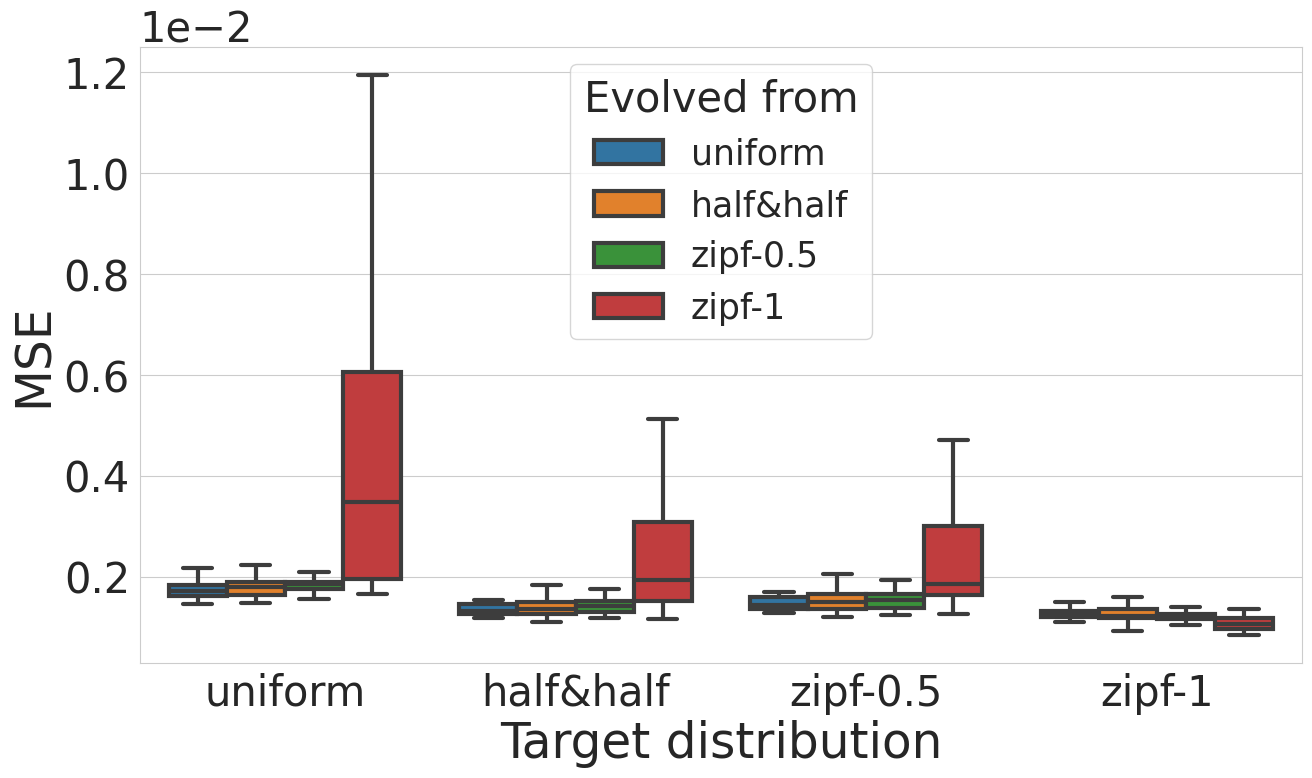

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sub_dists = ["uniform", "half", "zipfhalf", "zipf"]
change_name_dict = {
    "uniform": "uniform",
    "half": "half&half",
    "zipfhalf": "zipf-0.5",
    "zipf": "zipf-1",
}

data = []
for target_dist in sub_dists:
    for formula_dist in sub_dists:
        data += [
            [change_name_dict[target_dist], change_name_dict[formula_dist], mse]
            for mse in mse_dict[f"{formula_dist}-{target_dist}"]
        ]

df = pd.DataFrame(data, columns=["target", "dist-from", "mse"])
fig, ax = plt.subplots(figsize=(15, 8))
sns.set_style("whitegrid")
sns.boxplot(
    x="target",
    y="mse",
    hue="dist-from",
    data=df,
    ax=ax,
    showfliers=False,
    linewidth=3,
)
# ax.set_ylim(0, 0.0007)
ax.set_xlabel("Target distribution", fontsize=35)
ax.set_ylabel("MSE", fontsize=35)
ax.legend(
    fontsize=25, title="Evolved from", title_fontsize=30, loc="upper center"
)
ax.tick_params(axis="both", which="major", labelsize=30)
ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
ax.yaxis.offsetText.set_fontsize(30)
os.makedirs("/Better-Turing/figures", exist_ok=True)
plt.savefig(
    "/Better-Turing/figures/3.pdf",
    bbox_inches="tight",
)
plt.show()

In [41]:
# uniform

uniform_mse_by_uniform = df.loc[
    (df.target == "uniform") & (df["dist-from"] == "uniform"), "mse"
].values
uniform_mse_by_half = df.loc[
    (df.target == "uniform") & (df["dist-from"] == "half&half"), "mse"
].values
uniform_mse_by_zipfhalf = df.loc[
    (df.target == "uniform") & (df["dist-from"] == "zipf-0.5"), "mse"
].values
uniform_mse_by_zipf = df.loc[
    (df.target == "uniform") & (df["dist-from"] == "zipf-1"), "mse"
].values

print("At uniform distribution")
print(
    f"A12(half, uniform) = {vda(uniform_mse_by_half, uniform_mse_by_uniform)}"
)
print(
    f"A12(zipfhalf, uniform) = {vda(uniform_mse_by_zipfhalf, uniform_mse_by_uniform)}"
)
print(
    f"A12(zipf, uniform) = {vda(uniform_mse_by_zipf, uniform_mse_by_uniform)}"
)

# half
half_mse_by_uniform = df.loc[
    (df.target == "half&half") & (df["dist-from"] == "uniform"), "mse"
].values
half_mse_by_half = df.loc[
    (df.target == "half&half") & (df["dist-from"] == "half&half"), "mse"
].values
half_mse_by_zipfhalf = df.loc[
    (df.target == "half&half") & (df["dist-from"] == "zipf-0.5"), "mse"
].values
half_mse_by_zipf = df.loc[
    (df.target == "half&half") & (df["dist-from"] == "zipf-1"), "mse"
].values

print("At half distribution")
print(f"A12(uniform, half) = {vda(half_mse_by_uniform, half_mse_by_half)}")
print(f"A12(zipfhalf, half) = {vda(half_mse_by_zipfhalf, half_mse_by_half)}")
print(f"A12(zipf, half) = {vda(half_mse_by_zipf, half_mse_by_half)}")

# zipfhalf
zipfhalf_mse_by_uniform = df.loc[
    (df.target == "zipf-0.5") & (df["dist-from"] == "uniform"), "mse"
].values
zipfhalf_mse_by_half = df.loc[
    (df.target == "zipf-0.5") & (df["dist-from"] == "half&half"), "mse"
].values
zipfhalf_mse_by_zipfhalf = df.loc[
    (df.target == "zipf-0.5") & (df["dist-from"] == "zipf-0.5"), "mse"
].values
zipfhalf_mse_by_zipf = df.loc[
    (df.target == "zipf-0.5") & (df["dist-from"] == "zipf-1"), "mse"
].values

print("At zipfhalf distribution")
print(
    f"A12(uniform, zipfhalf) = {vda(zipfhalf_mse_by_uniform, zipfhalf_mse_by_zipfhalf)}"
)
print(
    f"A12(half, zipfhalf) = {vda(zipfhalf_mse_by_half, zipfhalf_mse_by_zipfhalf)}"
)
print(
    f"A12(zipf, zipfhalf) = {vda(zipfhalf_mse_by_zipf, zipfhalf_mse_by_zipfhalf)}"
)

# zipf
zipf_mse_by_uniform = df.loc[
    (df.target == "zipf-1") & (df["dist-from"] == "uniform"), "mse"
].values
zipf_mse_by_half = df.loc[
    (df.target == "zipf-1") & (df["dist-from"] == "half&half"), "mse"
].values
zipf_mse_by_zipfhalf = df.loc[
    (df.target == "zipf-1") & (df["dist-from"] == "zipf-0.5"), "mse"
].values
zipf_mse_by_zipf = df.loc[
    (df.target == "zipf-1") & (df["dist-from"] == "zipf-1"), "mse"
].values

print("At zipf distribution")
print(f"A12(uniform, zipf) = {vda(zipf_mse_by_uniform, zipf_mse_by_zipf)}")
print(f"A12(half, zipf) = {vda(zipf_mse_by_half, zipf_mse_by_zipf)}")
print(f"A12(zipfhalf, zipf) = {vda(zipf_mse_by_zipfhalf, zipf_mse_by_zipf)}")

At uniform distribution
A12(half, uniform) = 0.6121
A12(zipfhalf, uniform) = 0.7218
A12(zipf, uniform) = 0.9590000000000001
At half distribution
A12(uniform, half) = 0.4272
A12(zipfhalf, half) = 0.5545
A12(zipf, half) = 0.8415
At zipfhalf distribution
A12(uniform, zipfhalf) = 0.402
A12(half, zipfhalf) = 0.4627
A12(zipf, zipfhalf) = 0.8109
At zipf distribution
A12(uniform, zipf) = 0.8842
A12(half, zipf) = 0.8218
A12(zipfhalf, zipf) = 0.8119000000000001
